# Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import our libraries

In [2]:
from practicum_utils import get_loggi_files, global_connect, run_query, explained_time, careful_query

# Connect to configured DB

In [3]:
db = global_connect()

# Ready to query the DB

In [26]:
df_av1 = careful_query("""
SELECT DATE(a.sent) as date, count(distinct(i.itinerary_id)) as itineraries
FROM itineraries i
INNER JOIN availabilities a ON i.itinerary_id = a.itinerary_id
WHERE sent > '2019-10-01' AND distribution_center=1
GROUP BY DATE(a.sent)
""", 200000)

In [27]:
df_av1['date'] = pd.to_datetime(df_av1['date'])
df_av1.set_index(df_av1['date'], drop=True, inplace=True)

In [28]:
df_av1.head()

,date,itineraries
date,,
2019-12-17,2019-12-17,4
2019-12-18,2019-12-18,84
2019-12-19,2019-12-19,67
2019-12-20,2019-12-20,97
2019-12-21,2019-12-21,65


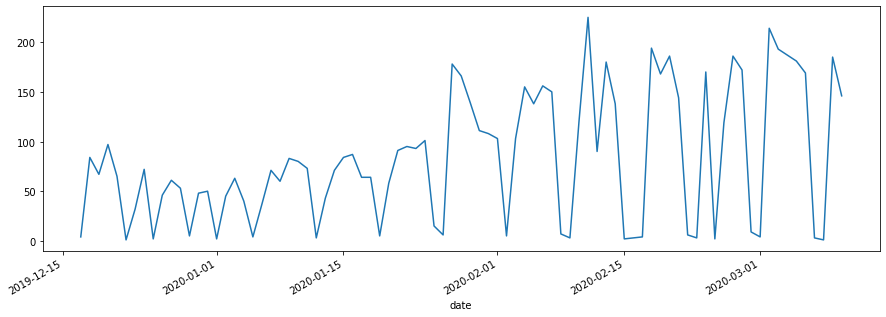

In [29]:
df_av1['itineraries'].plot(figsize=(15,5))

In [34]:
df_av2 = careful_query("""
SELECT DATE(a.sent) as date, count(distinct(a.itinerary_id)) as itineraries
FROM itineraries i
INNER JOIN availabilities a ON i.itinerary_id = a.itinerary_id
WHERE sent > '2019-10-01' AND distribution_center=2
GROUP BY DATE(a.sent)
""", 250000)

In [35]:
df_av2['date'] = pd.to_datetime(df_av2['date'])
df_av2.set_index(df_av2['date'], drop=True, inplace=True)

In [36]:
df_av2.head()

,date,itineraries
date,,
2019-12-17,2019-12-17,30
2019-12-18,2019-12-18,196
2019-12-19,2019-12-19,169
2019-12-20,2019-12-20,168
2019-12-21,2019-12-21,126


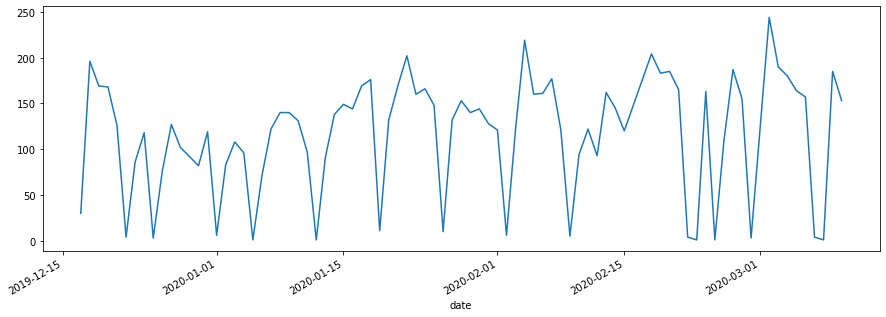

In [38]:
df_av2['itineraries'].plot(figsize=(15,5));